# **Отчет по лабораторной работе 4.6.1**  
#### С01-219

###   
Снимем зависимость уровня сигнала I от угла поворота α приёмной антенны относительно луча. Результаты занесем в Таблицу ниже.

In [123]:
import numpy as np
x_0 = [0, 20, 40, 60, 80, 100]
y = [56, 55, 45, 27, 6, 15]
data1 = [[0, 56], [20, 55], [40, 45], [60, 27], [80, 6], [100, 15]]

pd.DataFrame(data1, columns=["угол поворота", "мкВ"]) 
#print(data1.to_string(index=False))


,угол поворота,мкВ
0,0,56
1,20,55
2,40,45
3,60,27
4,80,6
5,100,15


 
11.75 x + 27.59


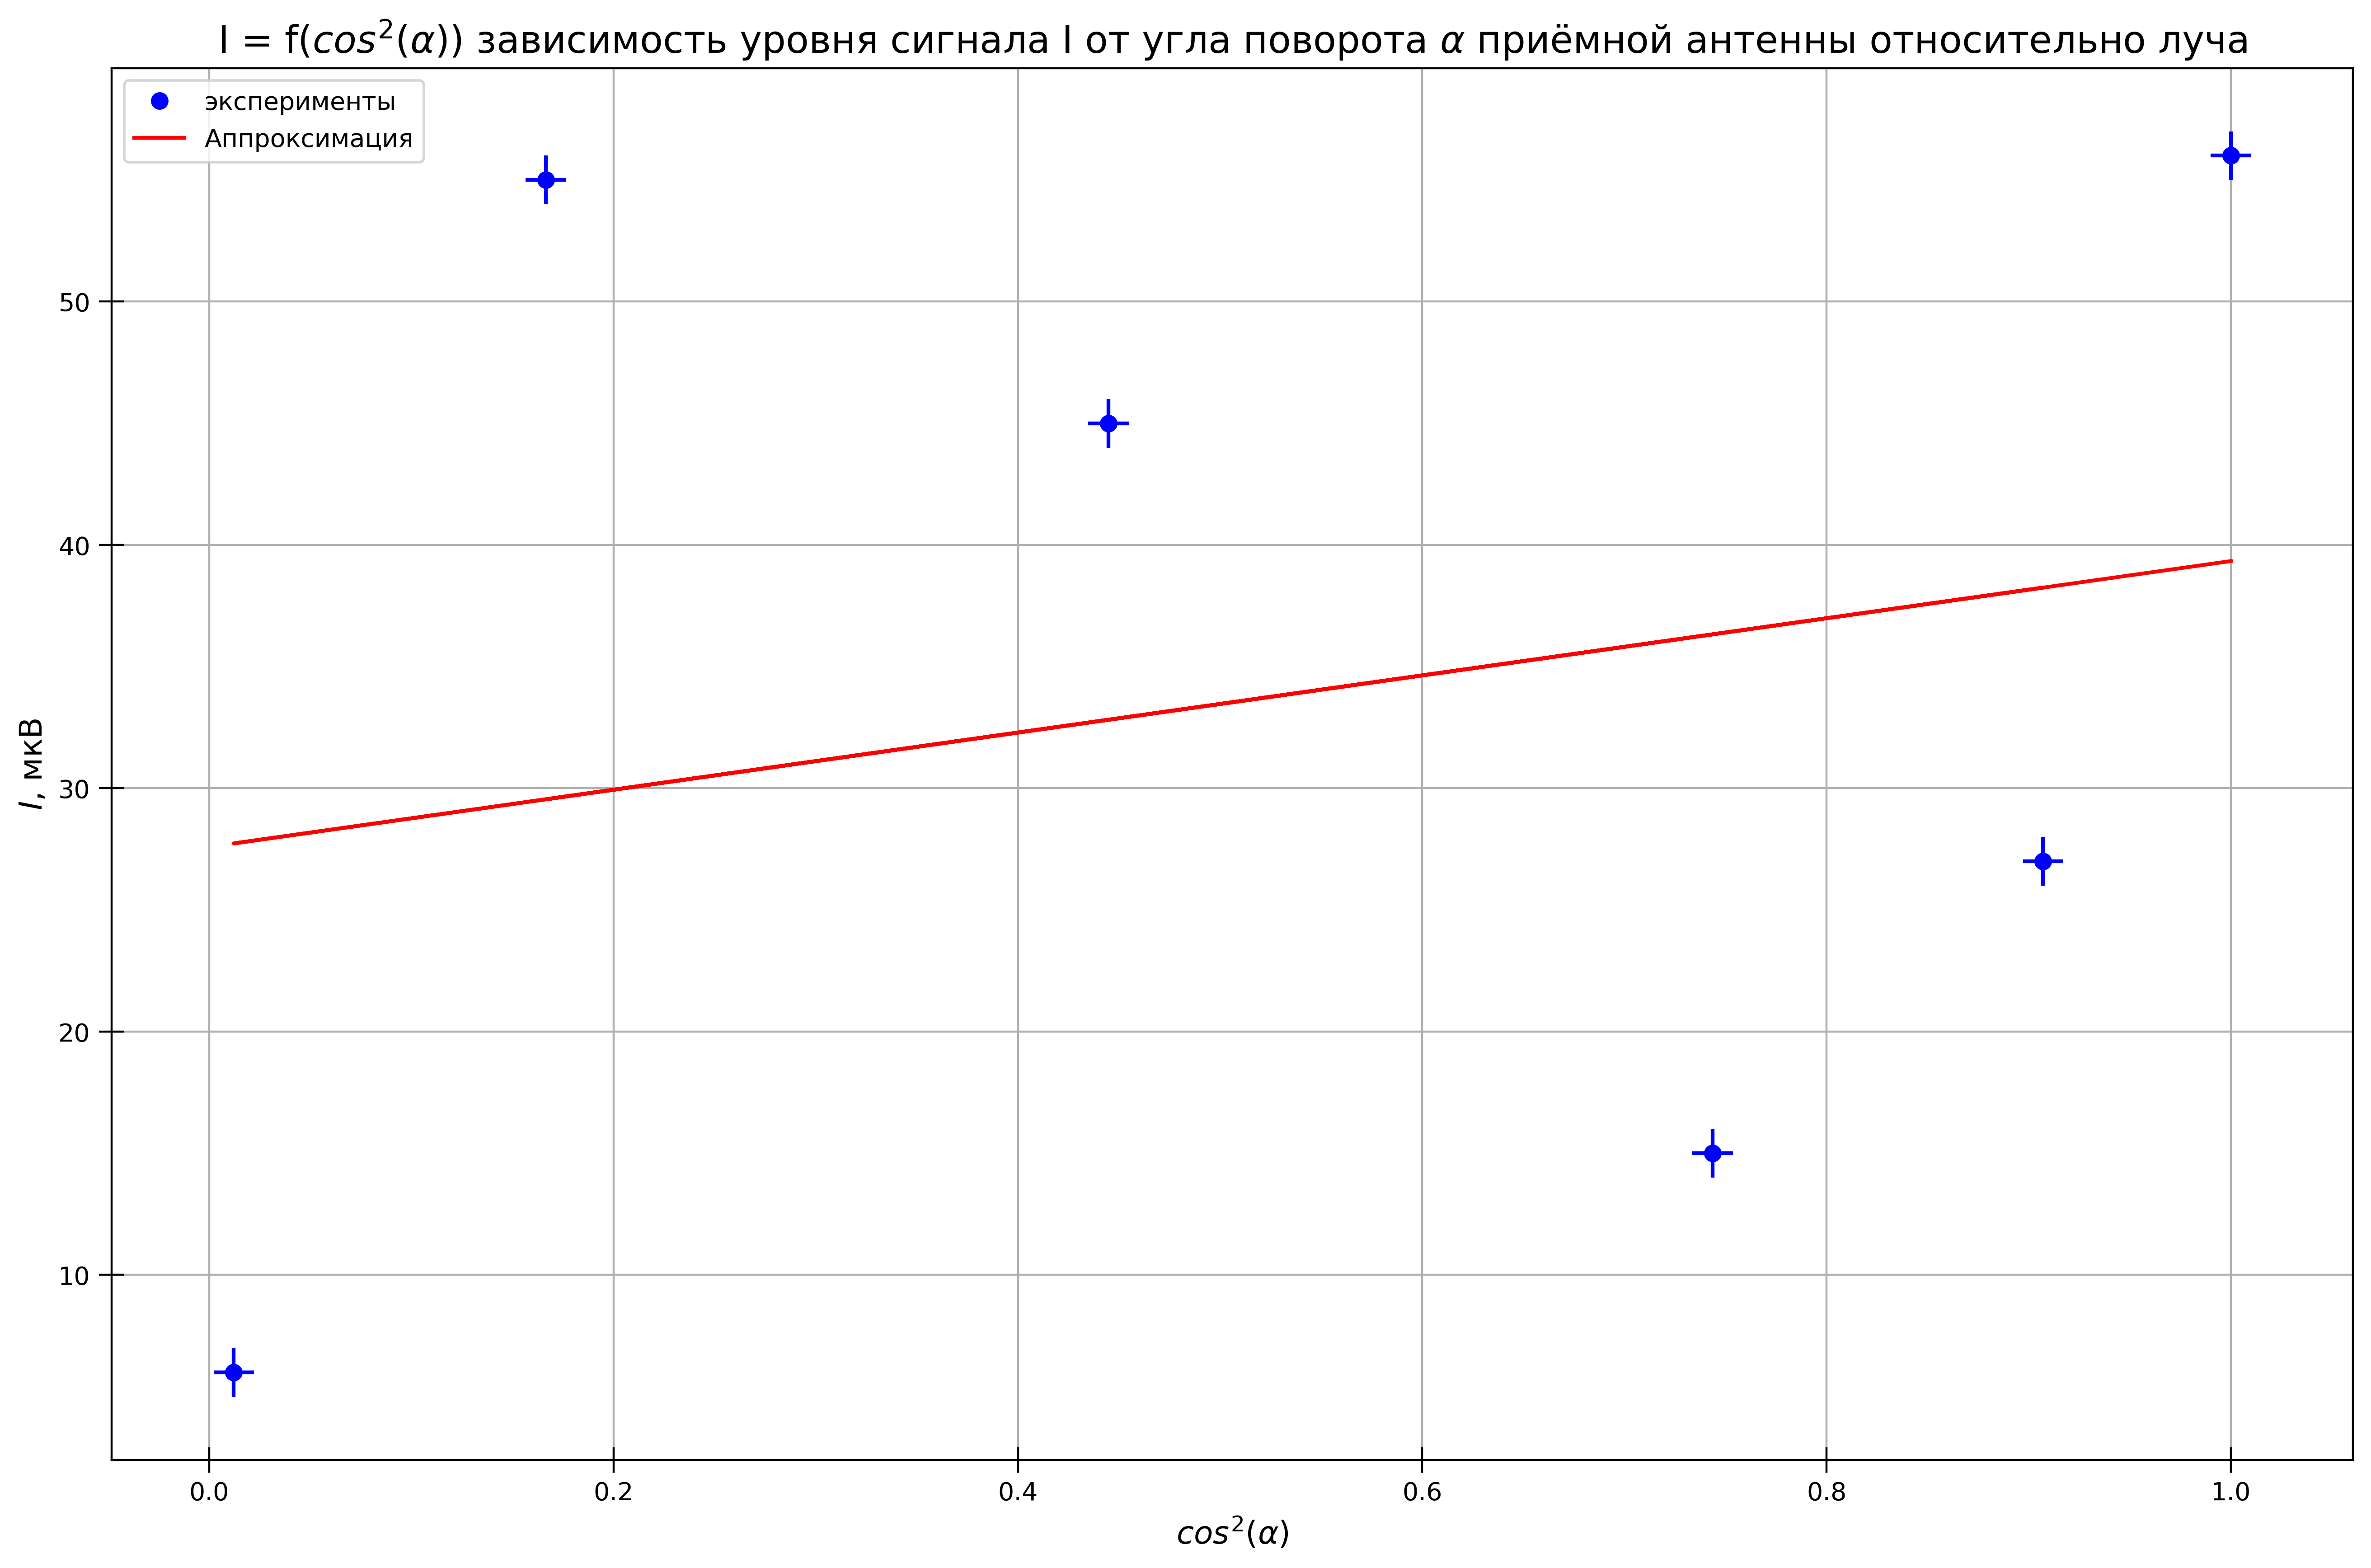

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from math import cos

fig, ax = plt.subplots(figsize = (16, 10), dpi=400) #настройка картинки

#I - интенсивность
x_0 = [0, 20, 40, 60, 80, 100]
y = [56, 55, 45, 27, 6, 15]
#угол
x = []
#cos^2(угол)
for i in range(0, len(x_0)):
    x.append(cos(x_0[i]) * cos(x_0[i]))


xerr = []
yerr = []

#Нахожденике погрешности в x и y {xerr и yerr}
for i in range(0, len(x)):
    xerr.append(1 / 100)    

for i in range(0, len(y)):
    yerr.append(1)
               
#yerr = [0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0000010, 0.0000010, 0.000001013]
#xerr = [10, 23, 23, 45, 12, 12, 11, 34, 56, 76, 12]
    

ax.set_xlabel(r"$cos^2(\alpha$)", fontsize=12.5)
ax.set_ylabel(r"$I$, мкВ", fontsize=12.5)
ax.set_title(r"I = f($cos^2$($\alpha$)) зависимость уровня сигнала I от угла поворота $\alpha$ приёмной антенны относительно луча", fontsize=15)#название графика

t = np.polyfit(x, y, 1) #аппроксимация (3-ий параметр - степень полинома подгонки)
f = np.poly1d(t)

ax.xaxis.set_minor_locator(plt.MultipleLocator(40)) #ticks
#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.tick_params(axis='both', which='major', direction='inout', length=10)
plt.tick_params(axis='both', which='minor', direction='inout', length=6)

ax.grid(which='major', linestyle='-') #сетка
ax.grid(which='minor', linestyle='--')

ax.plot(x, y, linestyle="None", marker='o', color="b", label = "эксперименты") #график
ax.plot(x, f(x), linestyle="-", marker='None', color="r", label = "Аппроксимация") #график

plt.errorbar(x, y, yerr=yerr, xerr=xerr, fmt='None', ecolor='b')#кресты погрешностей на графике

#plt.xlim(0.8, 5.2) #пределы графика
#plt.ylim(7, 44)

ax.legend()
print(f)

x1 = x
y1 = y
avgx= mean(x1)
avgy=mean(y1)
x_2 = [0] * len(x1)
y_2 = [0] * len(y1)
for i in range(len(x1)):
    x_2[i]=x1[i]**2

for i in range(len(x1)):
    y_2[i]=y1[i]**2

avgx2=mean(x_2)
avgy2=mean(y_2)                           #значение углового коэффициента
sigma=(((avgy2 - avgy**2)/(avgx2-avgx**2)-(11.75)**2)/(len(x1)))**0.5
#print(sigma) #абсолютная погрешность
#print(sigma / (11.75)) #относительная погрешность (делим на значение углового коэффициента)


fig.savefig("graph1_Malus_ law.png") #сохранение

 **Интерференция волн, отражённых от зеркала и решётки**


 Закрепим на фиксаторах перед зеркалом металлическую решётку и снимем зависимость интенсивности I от координаты x подвижного зеркала, занесем результаты в таблицу ниже. Построим График зависимости I(x)


In [202]:
import pandas as pd

x1 = [0, 0.25, 0.5, 1, 1.4, 1.69, 1.89, 2.15, 2.35, 2.69, 2.95, 3.20, 3.40, 3.70, 4, 4.3, 4.62, 4.89, 5.15, 5.40, 5.64, 5.84, 6, 6.29, 6.48, 6.74, 7, 7.25, 7.40, 7.57, 7.71, 7.83, 7.99]


y1 = [76, 76, 76, 64, 58, 42, 36, 31, 30, 31, 30, 44, 49, 59, 74, 80, 76, 71, 67, 60, 50, 50, 44, 39, 39, 36, 40, 48, 54, 60, 77, 82, 87]

df_to_append = pd.DataFrame({"x, мм": x1, "I, мкВ": y1})
print(df_to_append)

    x, мм  I, мкВ
0    0.00      76
1    0.25      76
2    0.50      76
3    1.00      64
4    1.40      58
5    1.69      42
6    1.89      36
7    2.15      31
8    2.35      30
9    2.69      31
10   2.95      30
11   3.20      44
12   3.40      49
13   3.70      59
14   4.00      74
15   4.30      80
16   4.62      76
17   4.89      71
18   5.15      67
19   5.40      60
20   5.64      50
21   5.84      50
22   6.00      44
23   6.29      39
24   6.48      39
25   6.74      36
26   7.00      40
27   7.25      48
28   7.40      54
29   7.57      60
30   7.71      77
31   7.83      82
32   7.99      87


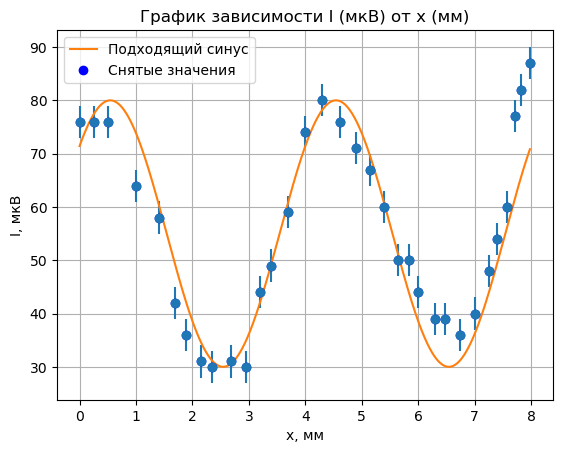

In [207]:

import matplotlib.pyplot as mpl
import numpy as np
x1 = [0, 0.25, 0.5, 1, 1.4, 1.69, 1.89, 2.15, 2.35, 2.69, 2.95, 3.20, 3.40, 3.70, 4, 4.3, 4.62, 4.89, 5.15, 5.40, 5.64, 5.84, 6, 6.29, 6.48, 6.74, 7, 7.25, 7.40, 7.57, 7.71, 7.83, 7.99]


y1 = [76, 76, 76, 64, 58, 42, 36, 31, 30, 31, 30, 44, 49, 59, 74, 80, 76, 71, 67, 60, 50, 50, 44, 39, 39, 36, 40, 48, 54, 60, 77, 82, 87]


x = np.arange(0, 7.99, 0.01)
data_sin = [2 * np.pi / (4) * x[i] + 7 for i in range(len(x))]
#print(np.std(data_sin))
erry = np.std(y1) / np.sqrt(len(x1))

mpl.errorbar(x1, y1, yerr = erry, fmt = 'o')
mpl.plot(x, 25 * np.sin(data_sin) + 55, label = "Подходящий синус")
mpl.plot(x1, y1, 'ob', label = "Снятые значения")
mpl.xlabel('x, мм')
mpl.ylabel('I, мкВ')
mpl.title("График зависимости I (мкВ) от x (мм)")
mpl.legend()
mpl.grid()
mpl.show()

По графику найдем длину волны
λ = 6.9 ± 0.5мм
И, соответственно, частоту
f = 43 ± 2 ГГц

**Интерферометр Майкельсона**

Измерим позицию n-того максимума от координаты, занесем результаты в Таблицу 3,
и по ней найдем длину волны излучения.

In [216]:
import pandas as pd
y1 = [84, 79, 74, 80, 85, 85, 80, 80, 77]

x1 = [0, 7.74, 6.00, 11.00, 15.35, 24.00, 27.75, 32.85, 36.55]


df_to_append = pd.DataFrame({"x, мм": x1, "I, мкВ": y1})
print(df_to_append)

   x, мм  I, мкВ
0   0.00      84
1   7.74      79
2   6.00      74
3  11.00      80
4  15.35      85
5  24.00      85
6  27.75      80
7  32.85      80
8  36.55      77


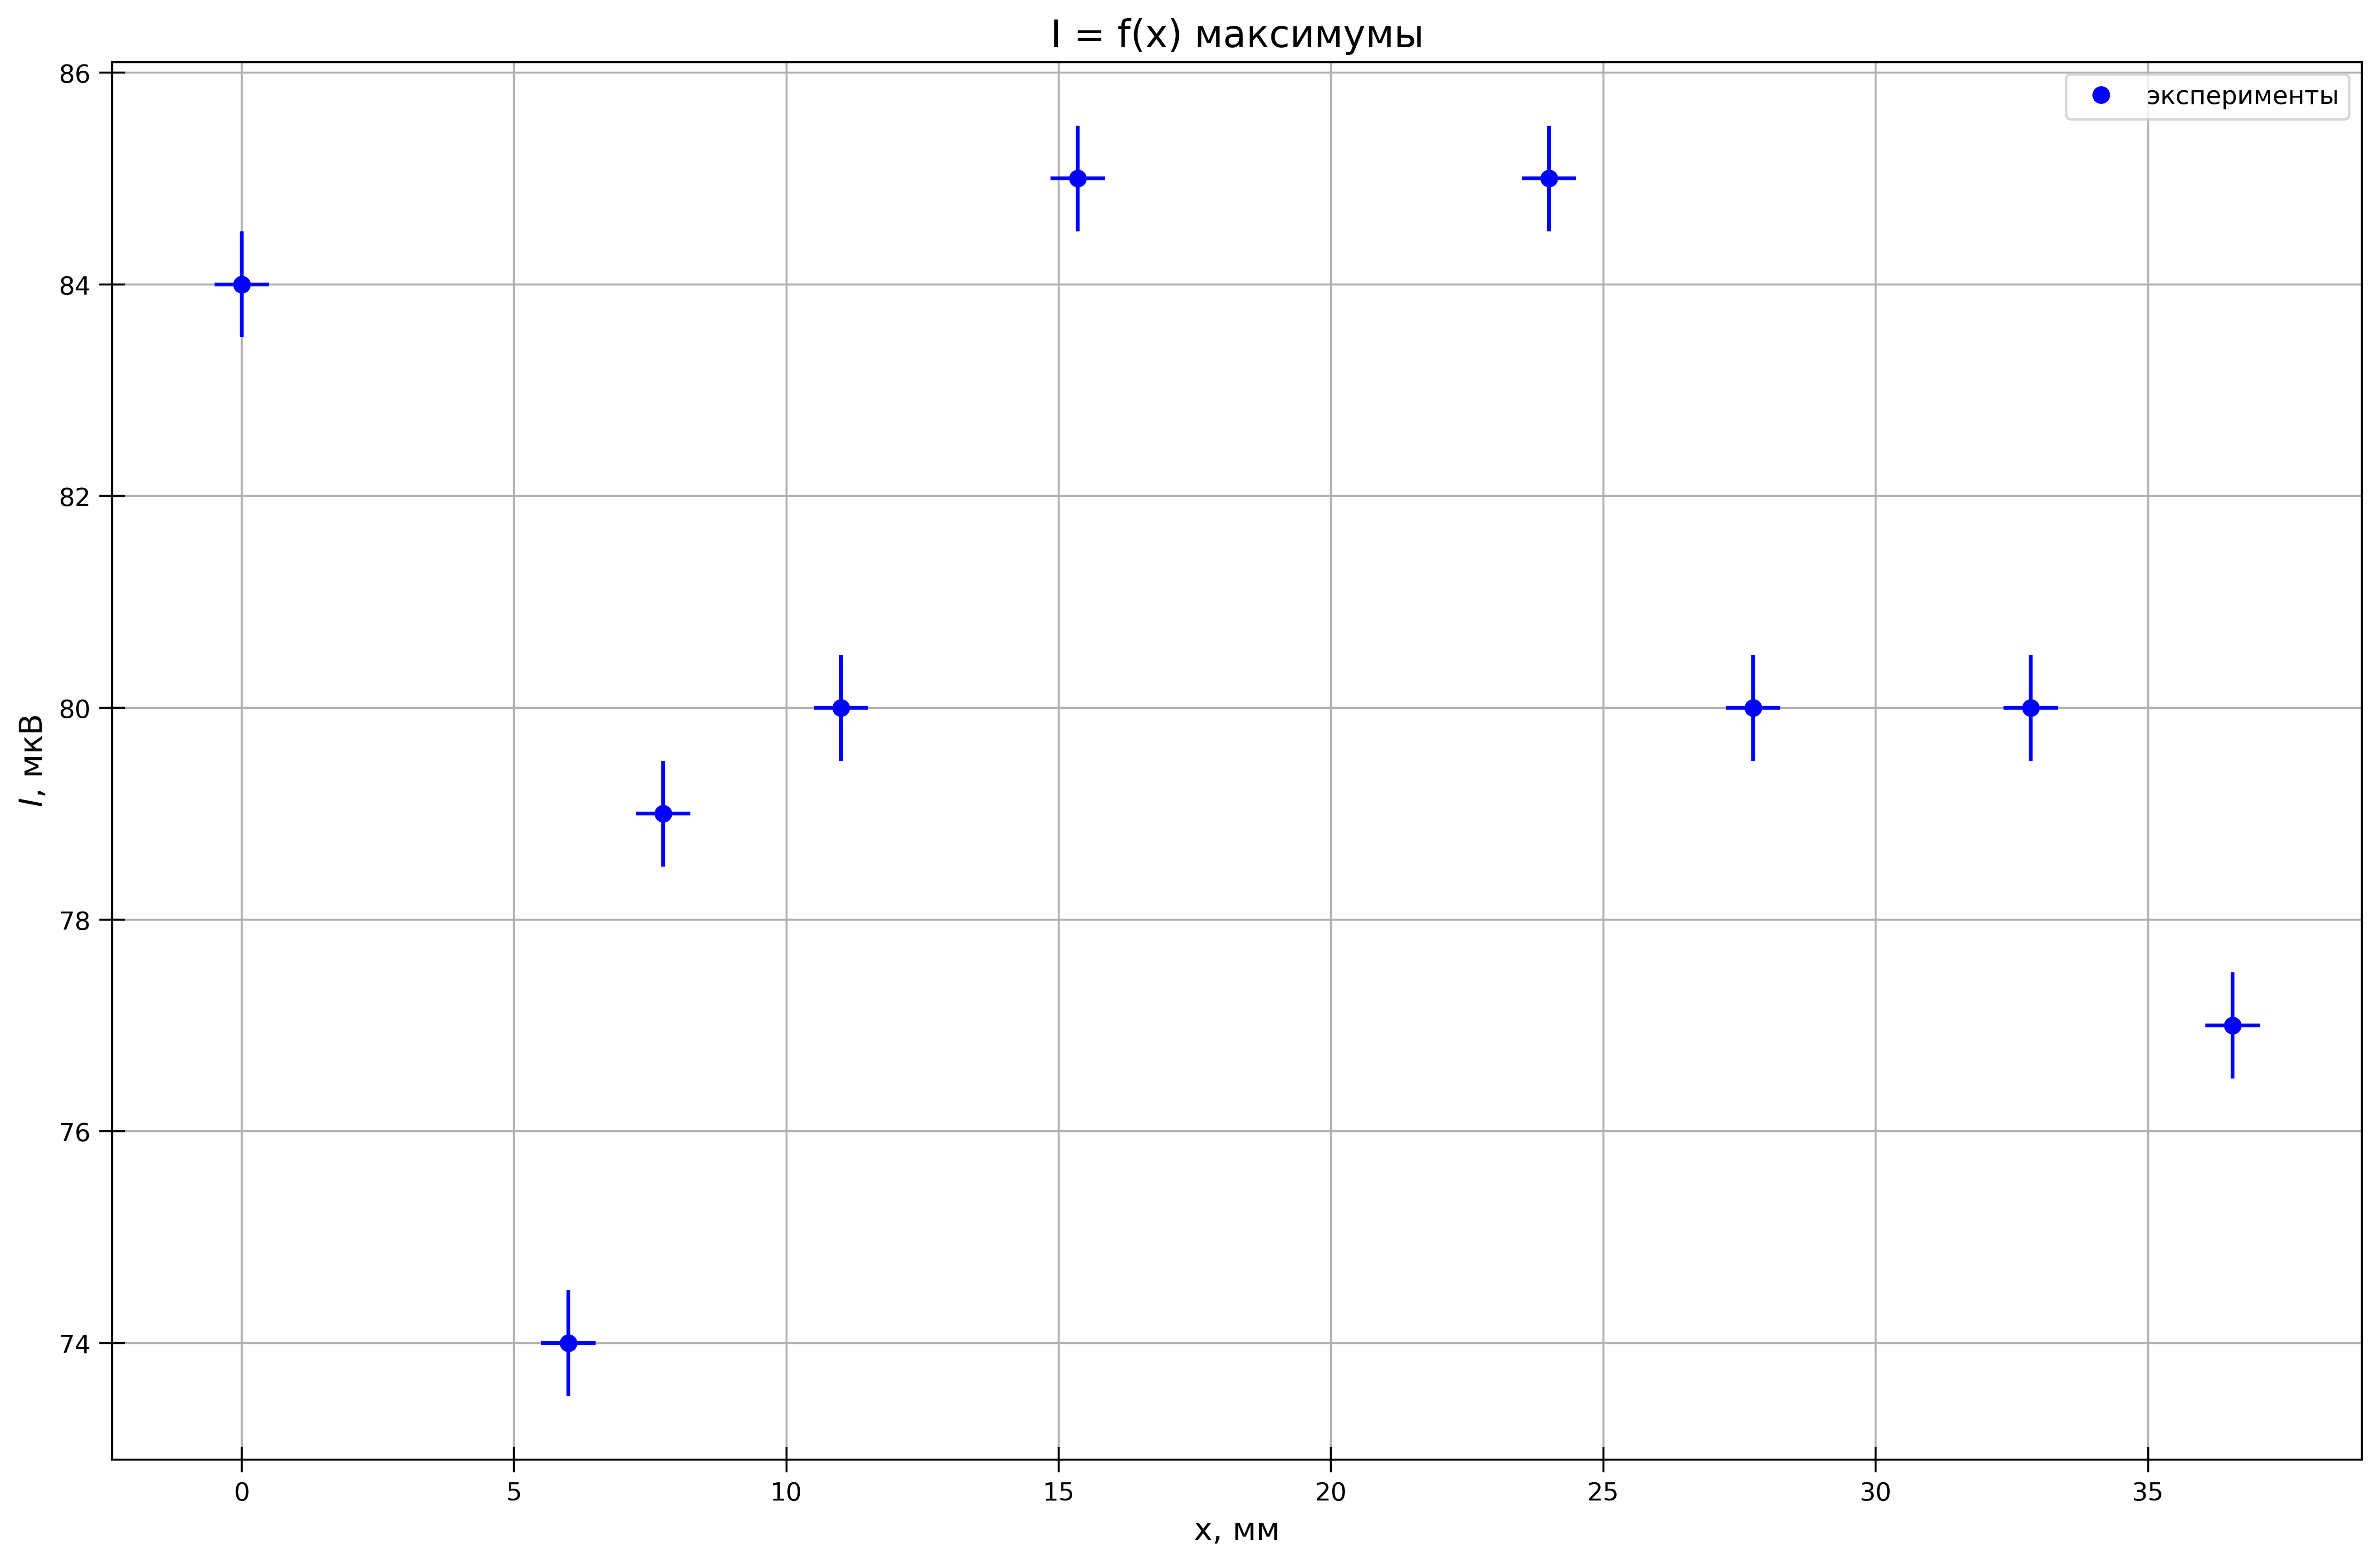

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from math import cos

fig, ax = plt.subplots(figsize = (16, 10), dpi=400) #настройка картинки

#I - интенсивность
y = [84, 79, 74, 80, 85, 85, 80, 80, 77]

x = [0, 7.74, 6.00, 11.00, 15.35, 24.00, 27.75, 32.85, 36.55]


xerr = []
yerr = []

#Нахожденике погрешности в x и y {xerr и yerr}
for i in range(0, len(x)):
    xerr.append(0.5)         #например, относительная погрешность 2 %

for i in range(0, len(y)):
    yerr.append((0.5))
               
#yerr = [0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0000010, 0.0000010, 0.000001013]
#xerr = [10, 23, 23, 45, 12, 12, 11, 34, 56, 76, 12]
    

ax.set_xlabel(r"x, мм", fontsize=12.5)
ax.set_ylabel(r"$I$, мкВ", fontsize=12.5)
ax.set_title(r"I = f(x) максимумы", fontsize=15)#название графика

#t = np.polyfit(x, y, 1) #аппроксимация (3-ий параметр - степень полинома подгонки)
#f = np.poly1d(t)

ax.xaxis.set_minor_locator(plt.MultipleLocator(40)) #ticks
#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.tick_params(axis='both', which='major', direction='inout', length=10)
plt.tick_params(axis='both', which='minor', direction='inout', length=6)

ax.grid(which='major', linestyle='-') #сетка
ax.grid(which='minor', linestyle='--')

ax.plot(x, y, linestyle="None", marker='o', color="b", label = "эксперименты") #график
#ax.plot(x, f(x), linestyle="-", marker='None', color="r", label = "Аппроксимация") #график

plt.errorbar(x, y, yerr=yerr, xerr=xerr, fmt='None', ecolor='b')#кресты погрешностей на графике

#plt.xlim(0.8, 5.2) #пределы графика
#plt.ylim(7, 44)

ax.legend()
#print(f)

x1 = x
y1 = y
avgx= mean(x1)
avgy=mean(y1)
x_2 = [0] * len(x1)
y_2 = [0] * len(y1)
for i in range(len(x1)):
    x_2[i]=x1[i]**2

for i in range(len(x1)):
    y_2[i]=y1[i]**2

avgx2=mean(x_2)
avgy2=mean(y_2)                           #значение углового коэффициента
#sigma=(((avgy2 - avgy**2)/(avgx2-avgx**2)-(7.117e-06)**2)/(len(x1)))**0.5
#print(sigma) #абсолютная погрешность
#print(sigma / (7.117e-06)) #относительная погрешность (делим на значение углового коэффициента)


fig.savefig("graph3_Milekson's_interferometer.png") #сохранение

**13.** Рассчитаем показатель преломления тефлона:

In [218]:
d = 3.2
dx = 1.1

n = dx / d + 1
print("Получили показатель преломления фторопласта, n =", n)

Получили показатель преломления фторопласта, n = 1.34375


### **IV.Вывод**  
Мы проверили закон Малюса (и убедились в его справедливости)

• Мы пронаблюдали и измерили интерференцию волн в плоской пластине и получили
значение длины волны f1 = 35 ± 2 ГГц

• Мы собрали и измерили интерферометр Майкельсона, точно получив длину волны
и, соответственно, частоту f2 = 36.12 ± 0.001 ГГц

• Сравним две частоты выше с частотой, на которую был настроен излучатель: femitter =
36.25

• Мы измерили показатель преломления тефлона n = 1.33 ± 0.02 (ntabl = 1.4)